In [1]:
from graphics import Graph3D, Graph2D, ajuste
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

aire2 = pd.read_csv("dataframe/Aire2.csv", delimiter=";")
aire2.replace([np.inf, -np.inf], np.nan, inplace=True)
aire2.dropna(inplace=True)
aire2[["theta1", "theta2"]] = aire2[["theta1", "theta2"]] * (np.pi / 180)
aire2[["omega1", "omega2"]] = aire2[["omega1", "omega2"]] * (np.pi / 180)

def first_aire2(t,gamma,omega,alpha,A):
    return max(aire2["theta1"])*np.exp(-gamma * t)*np.cos(omega*t + alpha) + A

def second_aire2(t,gamma,omega,alpha,A):
    return max(aire2["theta2"])*np.exp(-gamma * t)*np.cos(omega*t + alpha) + A


print(max(aire2["theta1"]))
print(max(aire2["theta2"]))


0.19722220547535926
0.15463617172669758


Gráfica guardada en: Graficos\ajuste_graficob1.png


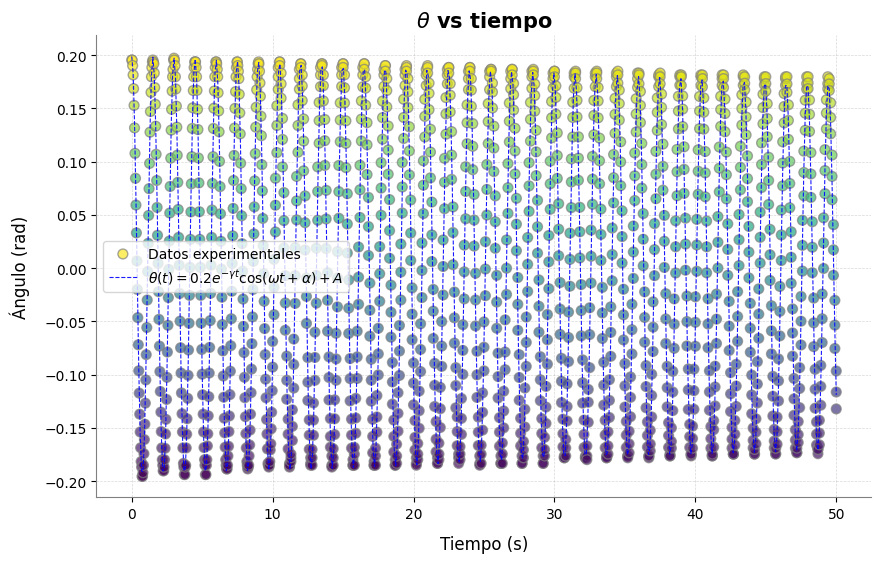

Parámetros ajustados:
Parámetro 1: 0.003
Parámetro 2: 4.194
Parámetro 3: -0.020
Parámetro 4: 0.002


In [2]:
param_1=ajuste(
    x_data=aire2["t1"], 
    y_data=aire2["theta1"], 
    modelo_func=first_aire2, 
    x_label="Tiempo (s)", 
    y_label="Ángulo (rad)", 
    etiqueta=r"$\theta$ vs tiempo", 
    modelo_latex=r"$\theta(t) =  0.2e^{-\gamma t} \cos(\omega t + \alpha) + A$",  # Ejemplo de función en LaTeX
    color_mapa="viridis", 
    p0=[0.1, 1, 0, max(aire2["theta1"])],  # Valores iniciales para gamma, omega, alpha, y A
    save_path= rf'Graficos\ajuste_graficob1.png'
)

Gráfica guardada en: Graficos\ajuste_graficob2.png


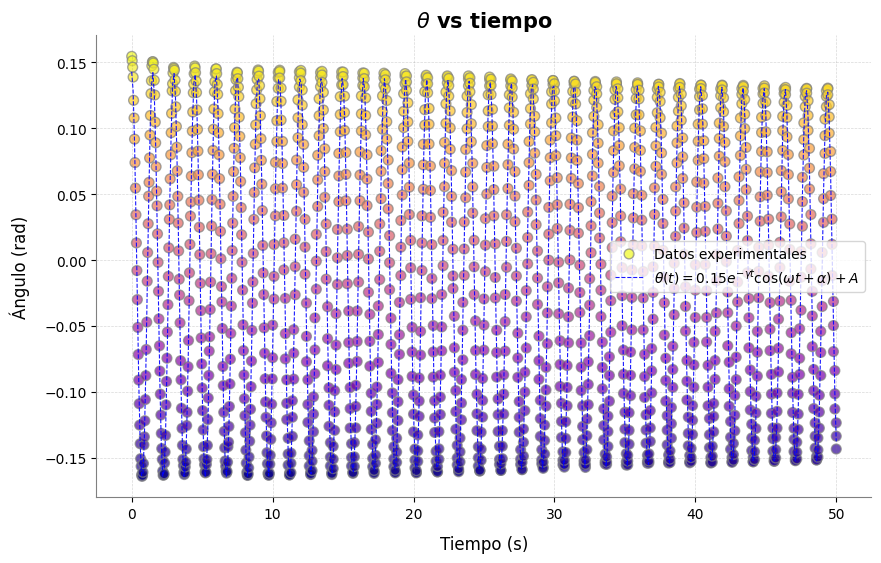

Parámetros ajustados:
Parámetro 1: 0.002
Parámetro 2: 4.200
Parámetro 3: 0.019
Parámetro 4: -0.012


In [3]:
param_2=ajuste(
    x_data=aire2["t2"], 
    y_data=aire2["theta2"], 
    modelo_func=second_aire2, 
    x_label="Tiempo (s)", 
    y_label="Ángulo (rad)", 
    etiqueta=r"$\theta$ vs tiempo", 
    modelo_latex=r"$\theta(t) =  0.15e^{-\gamma t} \cos(\omega t + \alpha) + A$",  # Ejemplo de función en LaTeX
    color_mapa="plasma", 
    p0=[0.1, 1, 0, max(aire2["theta2"])], # Valores iniciales para gamma, omega, alpha, y A
    save_path= rf'Graficos\ajuste_graficob2.png'
)

Gráfica 3D guardada en: Graficos\ajuste_graficob4.png


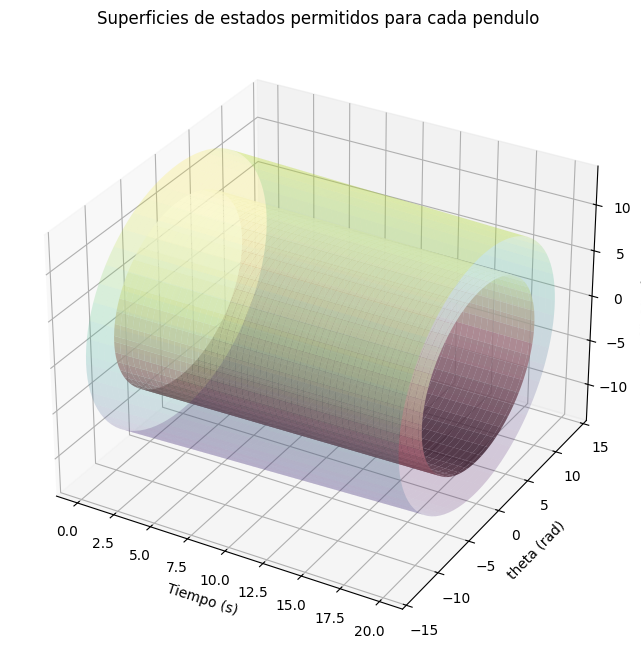

In [4]:

t = np.linspace(0, 20, 100)  # Dominio para t
theta = np.linspace(0, 2 * np.pi, 100)  # Dominio para theta

# Creando una malla
T, Theta = np.meshgrid(t, theta)
z1 = -13.6 * np.exp(-param_1[0] * T)  # z1
z2 = -9.64 * np.exp(-param_2[0] * T)   # z2


# Coordenadas del sólido de revolución
X = T
Y1 = z1 * np.cos(Theta)
Y2 = z2 * np.cos(Theta)


z1_solid = z1 * np.sin(Theta)
z2_solid = z2 * np.sin(Theta)


# Graficar el sólido de revolución
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y1, z1_solid, alpha=0.2, cmap='viridis')
ax.plot_surface(X, Y2, z2_solid, alpha=0.8, cmap='pink')


# Etiquetas
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel(rf'theta (rad)')
ax.set_zlabel(rf'omega (rad/s)')  # Corregido de 'z1' a 'Z'
ax.set_title('Superficies de estados permitidos para cada pendulo')

plt.savefig(rf'Graficos\ajuste_graficob4.png', format=rf'Graficos\ajuste_graficob4.png'.split('.')[-1], dpi=300, bbox_inches='tight')
print(f"Gráfica 3D guardada en: {rf'Graficos\ajuste_graficob4.png'}")

plt.show()

Gráfica 3D guardada en: Graficos\ajuste_graficob5.png


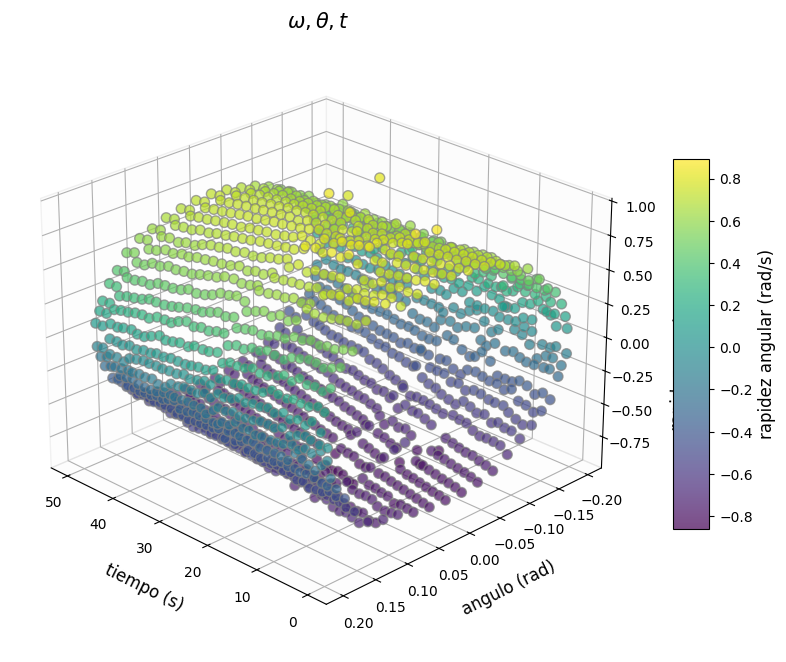

In [5]:
Graph3D(aire2["t1"],"tiempo (s)", aire2["theta1"],'angulo (rad)', aire2["omega1"],'rapidez angular (rad/s)', rf'$\omega,\theta,t$', 'viridis',save_path= rf'Graficos\ajuste_graficob5.png')

Gráfica 3D guardada en: Graficos\ajuste_graficob6.png


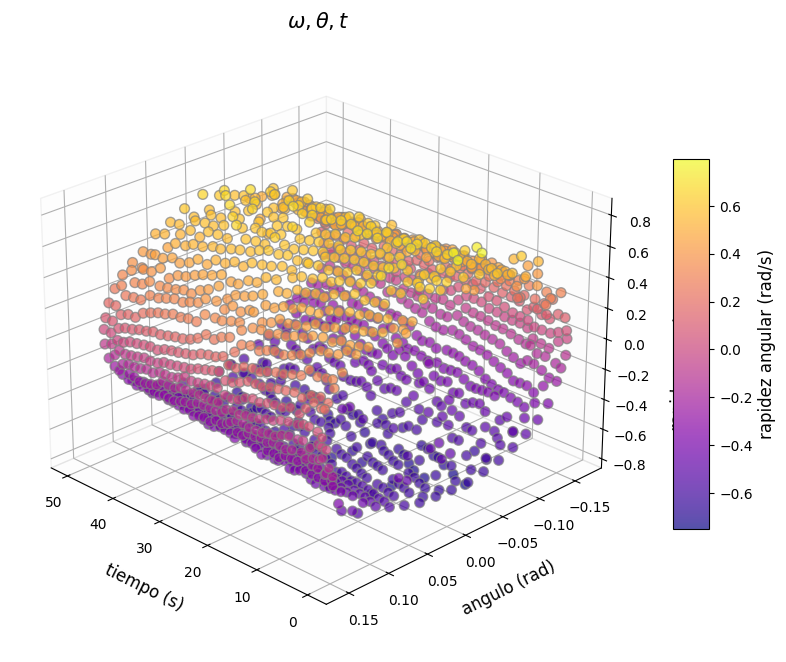

In [6]:
Graph3D(aire2["t2"],"tiempo (s)", aire2["theta2"],'angulo (rad)', aire2["omega2"],'rapidez angular (rad/s)', rf'$\omega,\theta,t$', 'plasma',save_path= rf'Graficos\ajuste_graficob6.png')